# SABASIC STATISTICS

## Descriptive Analytics for Numerical Columns

In [3]:
import pandas as pan
data=pan.read_csv('sales_data_with_discounts.csv')
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [9]:
data.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [17]:
numerical_columns=data.select_dtypes(include='number').columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [29]:
analytics=pan.DataFrame({
    'MEAN':data[numerical_columns].mean(),
    'MEDIAN':data[numerical_columns].median(),
    'MODE':data[numerical_columns].mode().iloc[0],
    'STANDARD_DEVIAION':data[numerical_columns].std()}
                       )
print(analytics)

                           MEAN       MEDIAN          MODE  STANDARD_DEVIAION
Volume                 5.066667     4.000000      3.000000           4.231602
Avg Price          10453.433333  1450.000000    400.000000       18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000       50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822           4.220602
Discount Amount     3346.499424   988.933733     69.177942        4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801       46358.656624


## Data Visualization

### ●	Histograms:

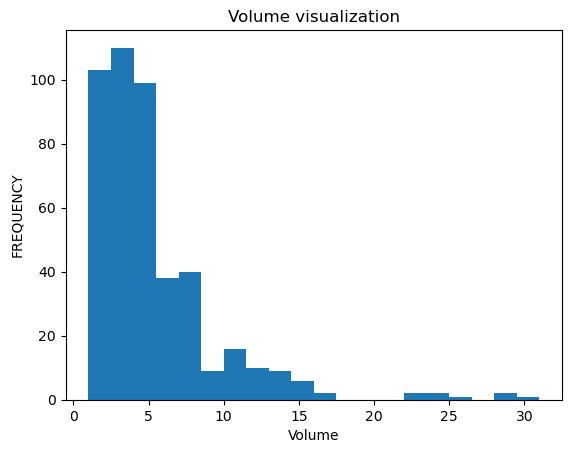

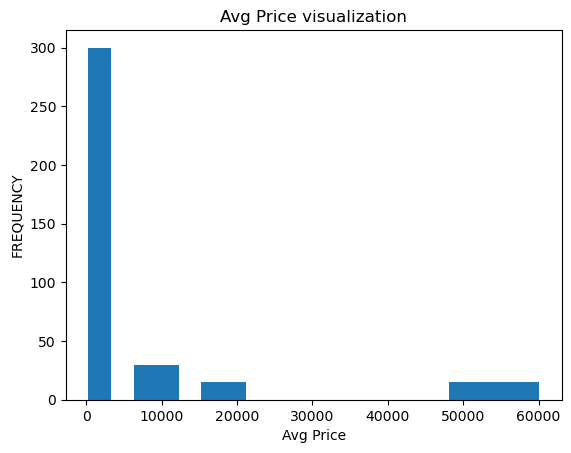

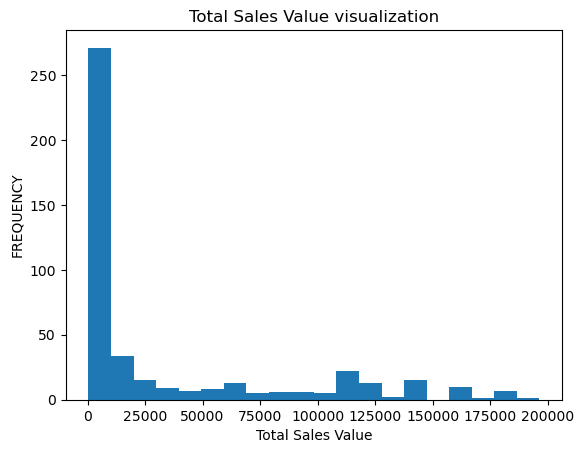

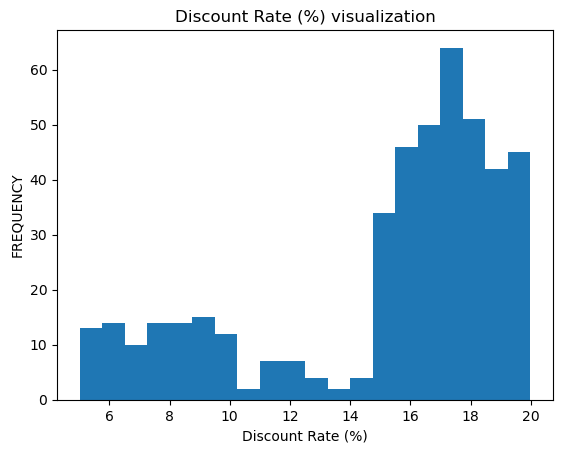

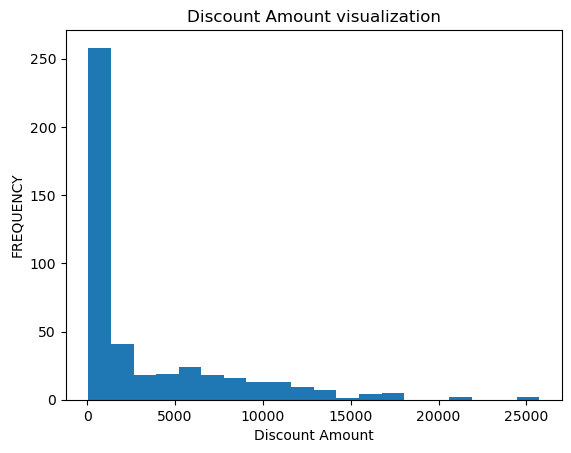

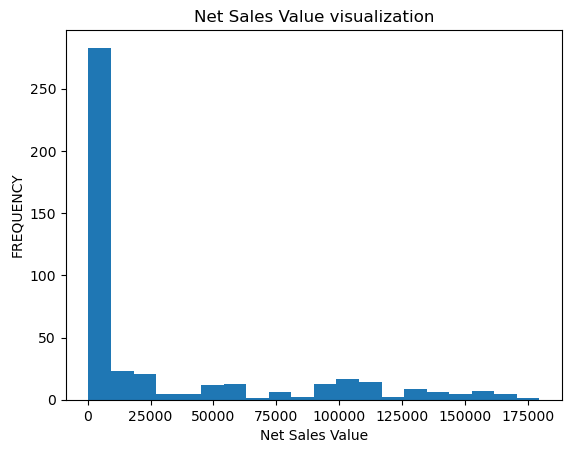

In [41]:
import matplotlib.pyplot as mat
for columns in numerical_columns:
    data[columns].plot(kind='hist',title=f'{columns} visualization',bins=20)
    mat.xlabel(columns)
    mat.ylabel('FREQUENCY')
    mat.show()

### ●	Boxplots

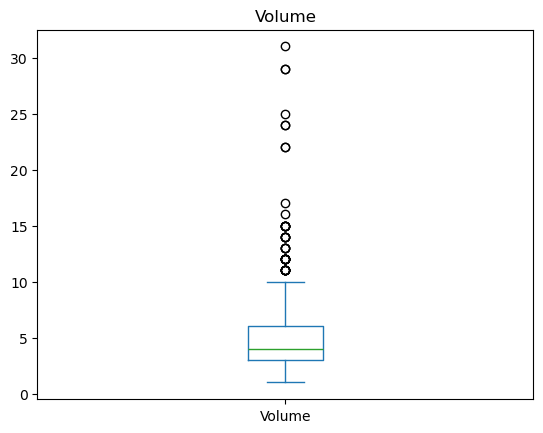

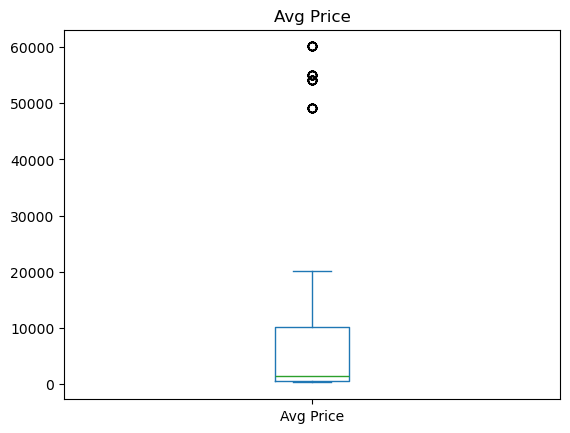

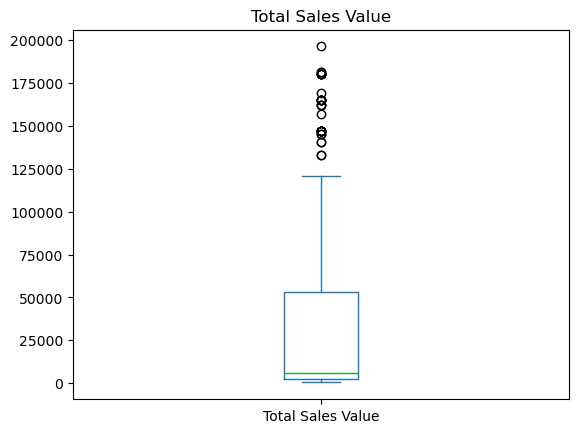

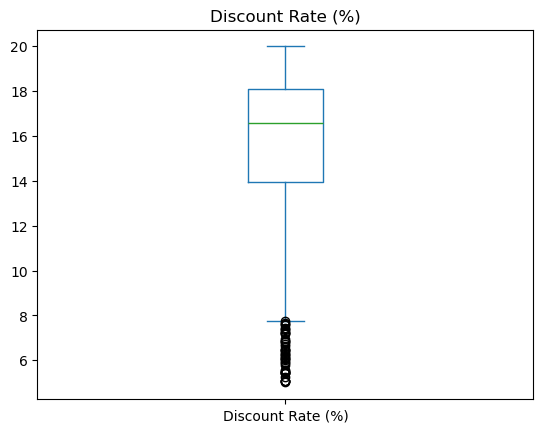

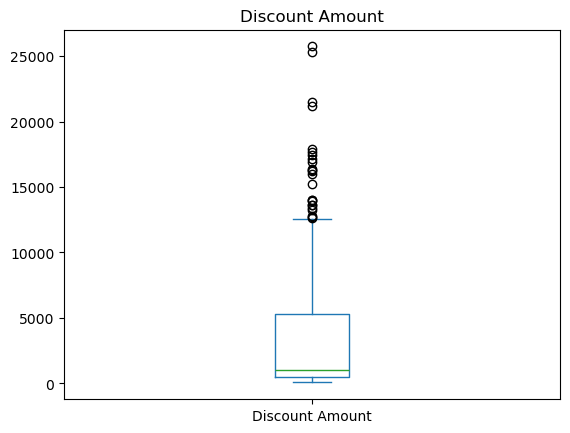

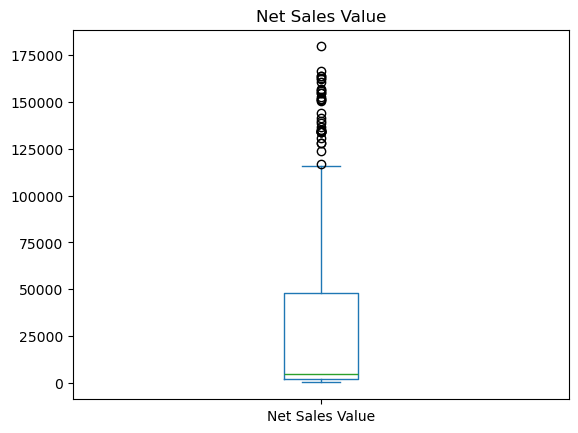

In [49]:
for columns in numerical_columns:
    data[columns].plot(kind='box',title=f'{columns}')
    mat.show()

### ●	Bar Chart Analysis for Categorical Column:

In [80]:
categorical_data=data.select_dtypes(include='object').columns
categorical_data

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

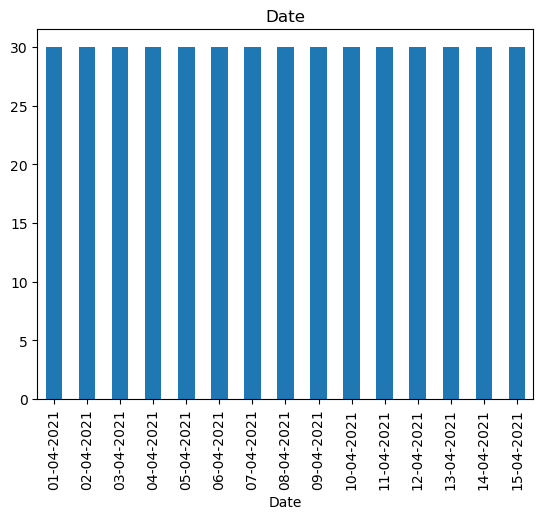

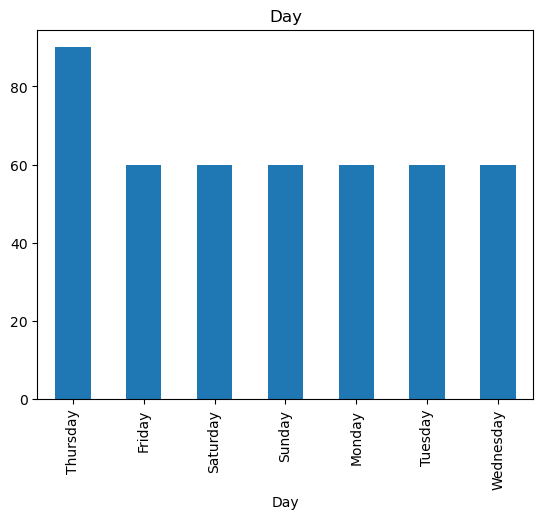

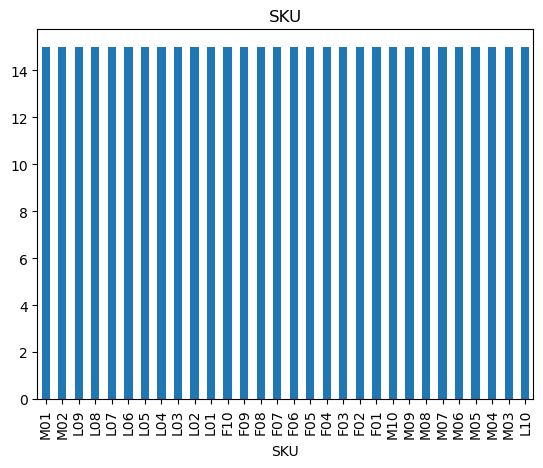

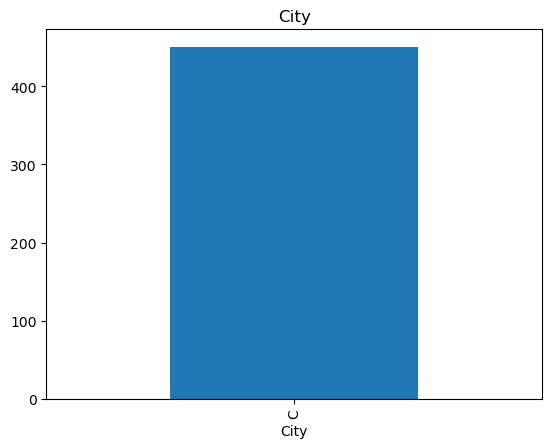

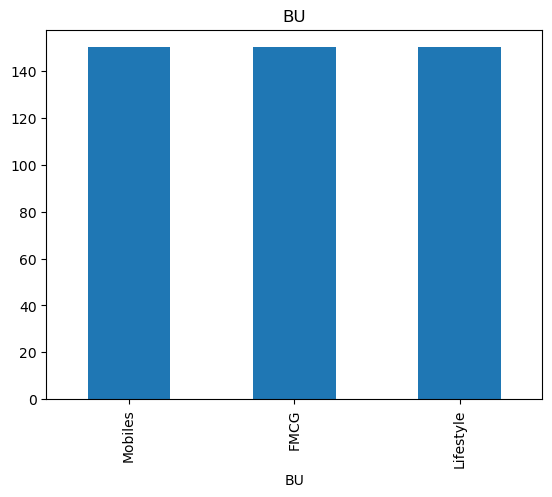

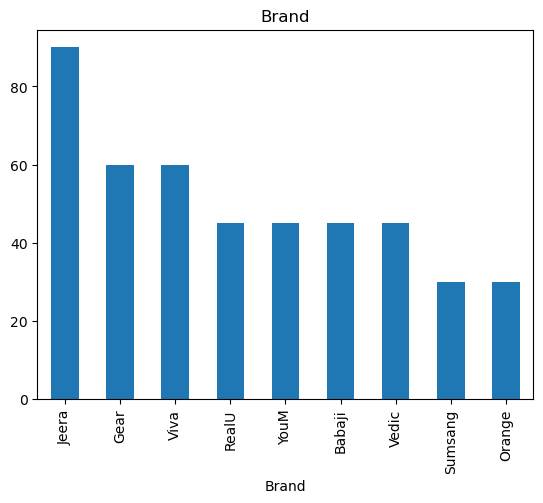

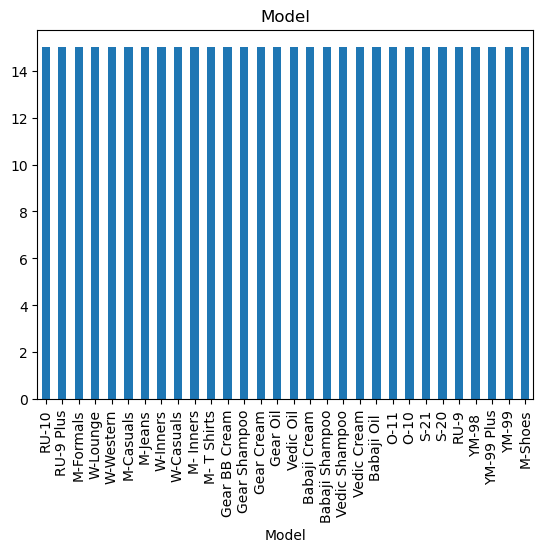

In [83]:
for columns in categorical_data:
    data[columns].value_counts().plot(kind='bar',title=f'{columns}')
    mat.show()
    

## Standardization of Numerical Variables

In [88]:
from sklearn.preprocessing import StandardScaler

In [110]:
stand=StandardScaler().fit_transform(data[numerical_columns])
standardized_data=pan.DataFrame(stand)
comparison=pan.DataFrame({
    'ORIGINAL_DATA':data[numerical_columns[0]],
    'STANDARDIZED_DATA':standardized_data[0]}
                        )
print(comparison)

     ORIGINAL_DATA  STANDARDIZED_DATA
0               15           2.350029
1               10           1.167129
2                7           0.457388
3                6           0.220808
4                3          -0.488932
..             ...                ...
445              2          -0.725512
446              6           0.220808
447              2          -0.725512
448              3          -0.488932
449              1          -0.962092

[450 rows x 2 columns]


## Conversion of Categorical Data into Dummy Variables

In [119]:
dummy=pan.get_dummies(data,columns=categorical_data,drop_first=True)
dummy

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
